 Text(0, 0, '0'),
 Text(0, 0, '20'),
 Text(0, 0, '40'),
 Text(0, 0, '60'),
 Text(0, 0, '80'),
 Text(0, 0, '0'),
 Text(0, 0, '20'),
 Text(0, 0, '40'),
 Text(0, 0, '60'),
 Text(0, 0, '80')]

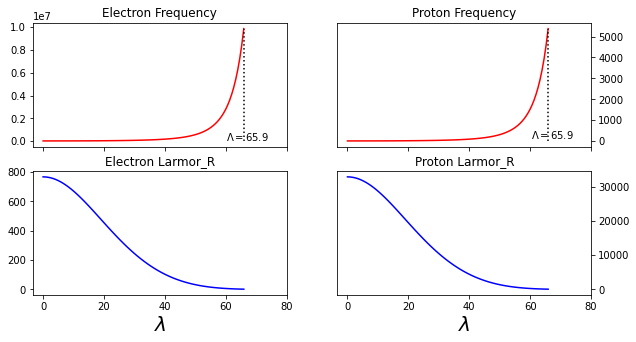

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

L = 6
electron_m = 9.1 * 10 **(-31) # kg
proton_m = 1.67 * 10 **(-27) # kg
charge_q = 1.6 * 10 **(-19) # C
B0 = 3 * 10**(-5) # T
eV = 1.6 * 10 **(-19) # C
energy = 10 **3 # eV

def velocity(mass):
  return np.sqrt((2*energy * eV)/(mass))

large_lambda = np.arccos(np.sqrt(1/L)) # Radian
lambda_ = np.linspace(0,large_lambda,100)

def frequency(mass):
  return (charge_q * B0 * np.sqrt(1 + 3 * np.sin(lambda_) **2))/(mass * (L * np.cos(lambda_) **2)**3)

fig, ax = plt.subplots(2,2,sharex=True,sharey=False,figsize=(10,5))

def plot(mass):
  i = 0

  if mass == electron_m:
    j = 0
    ax[i, j].set_title("Electron Frequency")
    ax[i+1, j].set_title("Electron Larmor_R")
  else:
    j = 1
    ax[i,j].yaxis.tick_right()
    ax[i+1,j].yaxis.tick_right()
    ax[i, j].set_title("Proton Frequency")
    ax[i+1, j].set_title("Proton Larmor_R")

  ax[i,j].plot(lambda_,frequency(mass),color='red')
  ax[i+1,j].plot(lambda_,velocity(mass)/frequency(mass),color='blue')
  ax[i,j].plot(np.linspace(large_lambda,large_lambda,100),frequency(mass),linestyle=':',color='black')
  ax[i,j].text(large_lambda - 0.1,100,r'$\Lambda = $'+str(round(np.degrees(large_lambda),1)),fontsize=10)
  ax[i+1,j].set_xlabel(r'$\lambda$',fontsize=20)

mass_value = [electron_m,proton_m]

for k in mass_value:
  plot(k)

plt.setp(ax, xticks=np.linspace(0,np.radians(80),5,endpoint=True), xticklabels = list(map(str,[0,20,40,60,80])))

Text(0.5, 1.0, 'Loss-Cone-Angle')

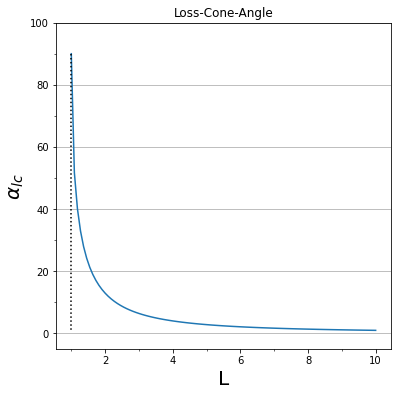

In [ ]:
plt.close()

L = np.linspace(1,10,100,endpoint=True)
large_lambda = np.arccos(np.sqrt(1/L))
LCA = np.arcsin(np.sqrt(np.cos(large_lambda)**6)/np.sqrt(1 + 3 * np.sin(large_lambda)**2))

plt.figure(figsize=(6,6))
ax = plt.gca()
plt.plot(L,LCA)
plt.plot(np.linspace(1,1,100),LCA,linestyle=':',color='black')
plt.setp(ax, yticks=np.linspace(0,np.radians(100),6,endpoint=True), yticklabels = list(map(str,[0,20,40,60,80,100])))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylim(np.radians(-5),np.radians(100))
ax.yaxis.set_minor_locator(MultipleLocator(np.radians(100)/10))
plt.xlabel('L',fontsize=20)
plt.ylabel(r'$\alpha_{lc}$',fontsize=20)
plt.grid(axis='y')
plt.title('Loss-Cone-Angle')